# redundant calibration

Nick Kern
<br>
May, 2022

See Dillon et al. 2018 and Dillon et al. 2021 for notes on the degeneracies associated with redundant calibration (1. average amplitude and 2. East-West phase gradient i.e. tip-tilt gradient). See Kern et al. 2020 for an example of how these degenerate terms are calibrated and added to the redcal solutions to make the full redcal-abscal gains.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy import stats

from pyuvdata import UVData, UVBeam
import linsolve
import hera_cal as hc

from collections import OrderedDict as odict
from hera_cal.abscal import fill_dict_nans

In [2]:
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)

In [3]:
# load the metadata
hd = hc.io.HERAData('/net/sinatra/vault-ike/ntsikelelo/Simulated_data_files/UVH5_files/Model_first_order_visibilities_2h_boosted_low.uvh5')
hd2 = hc.io.HERAData('/net/sinatra/vault-ike/ntsikelelo/Simulated_data_files/UVH5_files/Corrected_redundant_array_Model_zeroth_order_visibilities_2h_low_baseline_selected.uvh5')
hd_unfil = hc.io.HERAData('/net/sinatra/vault-ike/ntsikelelo/Simulated_data_files/UVH5_files/Raw_data_non_redundant_with_noise_low_2h.uvh5')
lsts = np.unwrap(hd.lsts) * 12/np.pi
freqs = hd.freq_array
antpos, ants = hd.get_ENU_antpos(pick_data_ants=True)
antpos_d = dict(zip(ants, antpos))

In [5]:

time=np.unique(hd2.time_array)[128:129]
# only load a couple of times and frequencies
pol=hd.polarization_array
hd.read(polarizations=pol[0],frequencies=freqs,times=time)
hd2.read(polarizations=pol[0],frequencies=freqs,times=time)
hd_unfil.read(polarizations=pol[0],frequencies=freqs,times=time)

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994858716 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994860333 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994857206 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


(<hera_cal.datacontainer.DataContainer at 0x7f08b1536990>,
 <hera_cal.datacontainer.DataContainer at 0x7f088c002850>)

In [6]:
# inflate by full redundancy
reduncy_xtalk=False
if reduncy_xtalk:
    hd.inflate_by_redundancy()
hd.conjugate_bls()
hd._determine_blt_slicing()
hd._determine_pol_indexing()


hd_red=copy.deepcopy(hd)
hd_red.inflate_by_redundancy()   
hd_red.conjugate_bls()
hd_red._determine_blt_slicing()
hd_red._determine_pol_indexing()

Missing some redundant groups. Filling in available data.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.4000000003042765 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.4000000003042765 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


In [7]:
# hd2.inflate_by_redundancy()
hd2.conjugate_bls()
hd2._determine_blt_slicing()
hd2._determine_pol_indexing()

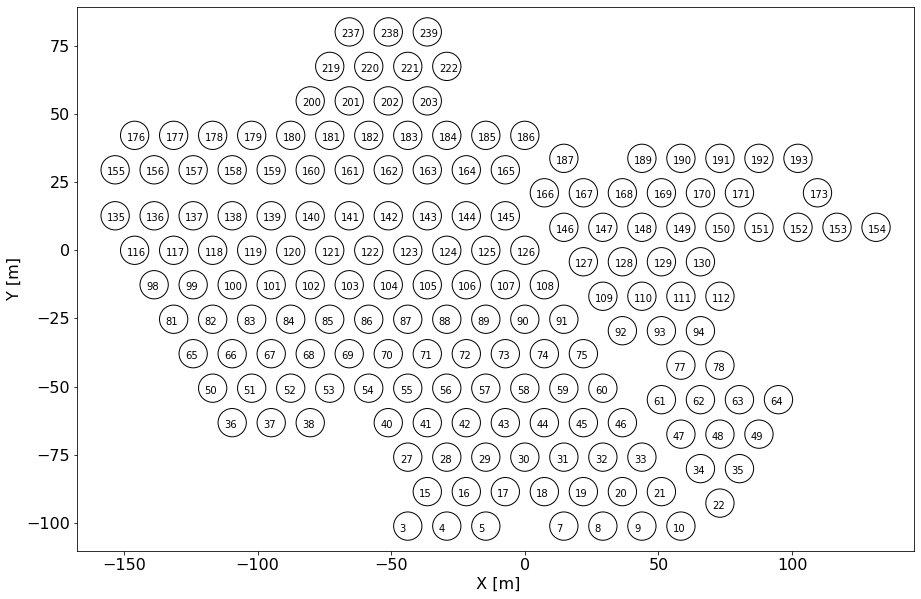

In [8]:
antpos, ants = hd.get_ENU_antpos(pick_data_ants=True)
antpos_d = dict(zip(ants, antpos))
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(antpos[:, 0], antpos[:, 1], fc='none', ec='k', s=800)
plt.xlabel(" X [m]")
plt.ylabel("Y [m]")
for i, ant in enumerate(ants):
    plt.text(antpos[i,0]-3, antpos[i,1]-2, ant, fontsize=10)

In [10]:
baseline_match_array=np.load("/home/ntsikelelo/Simulated_data_files/matched_baselines.npy")
bls_match=[]
for i in range (len(baseline_match_array)):
    key=baseline_match_array[i,:]    
    bls_match.append((key[0],key[1]))

In [11]:
hd2.select(bls=bls_match)
hd.select(bls=bls_match)
hd_red.select(bls=bls_match)

hd_unfil.select(bls=bls_match)

hd.x_orientation = 'east'
hd2.x_orientation = 'east'
hd_unfil.x_orientation='east'

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994860333 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994858716 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994858716 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1.3999999994857206 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


In [12]:
model2, _, _ = hd2.build_datacontainers() #sky model
# load datacontainer
data_un, _, _ = hd_unfil.build_datacontainers() 
model, _, _ = hd.build_datacontainers() #x-talks
model_red, _, _ = hd_red.build_datacontainers() #x-talks
 
Ntimes, Nfreqs = hd.Ntimes, hd.Nfreqs
freqs = hd.freq_array[0]/1e6

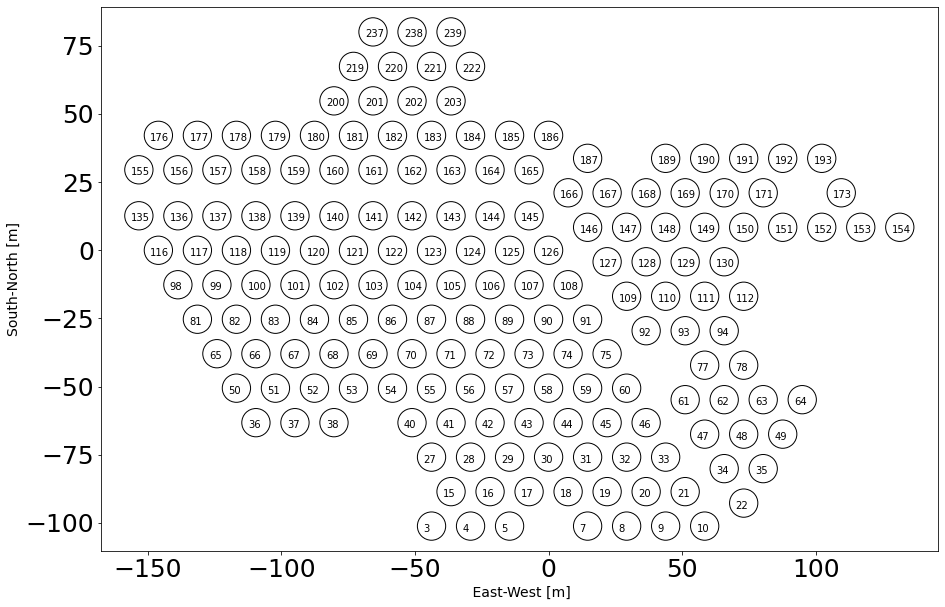

In [13]:
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)
antpos, ants = hd2.get_ENU_antpos(pick_data_ants=True)
antpos_d = dict(zip(ants, antpos))
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(antpos[:, 0], antpos[:, 1], fc='none', ec='k', s=800)
for i, ant in enumerate(ants):
    plt.text(antpos[i,0]-3, antpos[i,1]-2, ant, fontsize=10)
    plt.xlabel(" East-West [m]")
    plt.ylabel("South-North [m]")

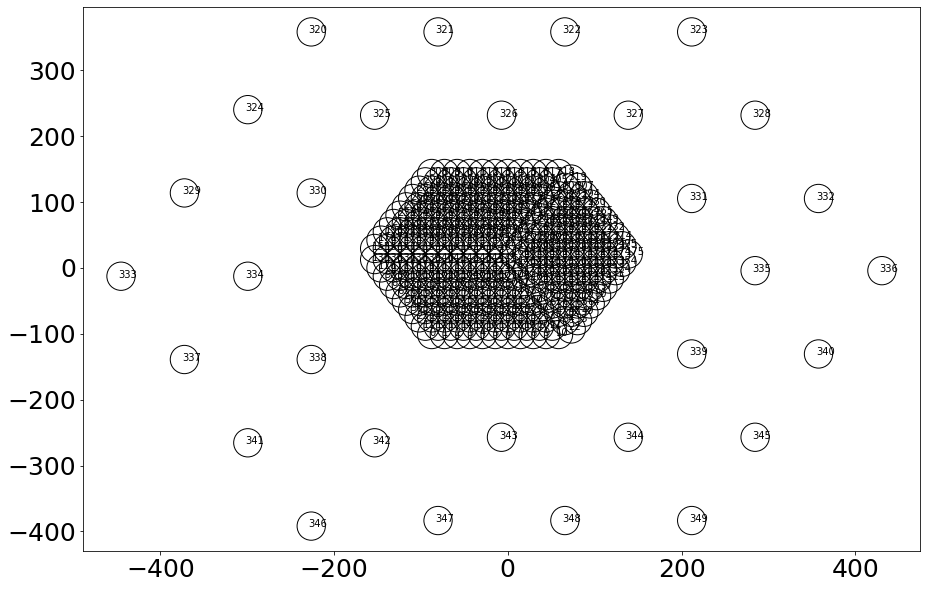

In [14]:
antpos, ants = hd.get_ENU_antpos()
antpos_d = dict(zip(ants, antpos))
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(antpos[:, 0], antpos[:, 1], fc='none', ec='k', s=800)
for i, ant in enumerate(ants):
    plt.text(antpos[i,0]-3, antpos[i,1]-2, ant, fontsize=10)

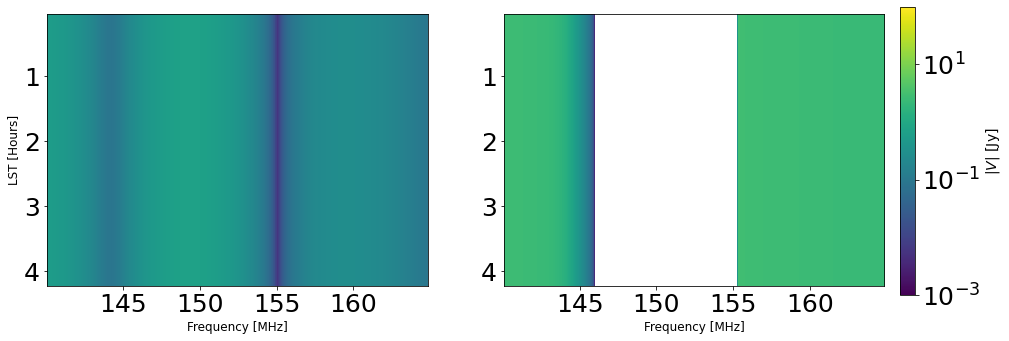

In [15]:
import matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
bls=(74, 75, 'ee')
ax = axes[0]
cax=ax.imshow(np.abs(model[bls]), aspect='auto', norm=matplotlib.colors.LogNorm(vmin=1, vmax=1e4),
          extent=[freqs[0], freqs[-1], lsts[-1],lsts[0]])
# ax.set_xlim(150, 168); 
ax.set_title("")
ax.set_xlabel('Frequency [MHz]', fontsize=12); ax.set_ylabel('LST [Hours]', fontsize=12)


ax = axes[1]
cax=ax.imshow(np.angle(model[bls]), aspect='auto', norm=matplotlib.colors.LogNorm(vmin=1e-3, vmax=1e2),
          extent=[freqs[0], freqs[-1], lsts[-1],lsts[0]])
# ax.set_xlim(150, 168); 
ax.set_xlabel('Frequency [MHz]', fontsize=12); 
ax.set_title("")

cbax = fig.add_axes([0.83, 0.1, 0.1, 0.8])
cbax.axis('off')
cbar = fig.colorbar(cax, ax=cbax, label=r"$|V|$ [Jy]");


In [19]:
# # get a list of antennas
# ants_mod = sorted(set(np.ravel([k[:2] for k in model.keys()])))
# np.random.seed(0)
# Nants = len(ants_mod)
# amps = np.random.normal(0.03, 0.001, Nants) # amp
# #phs = np.random.normal(0, np.pi/4, Nants) # radians
# dly =0*np.random.normal(0, 200, Nants) * 1e-9 # in seconds
# amp_plaw = np.random.normal(-2.6, 0.2, Nants)
# gains = amps * (freqs[:, None] / 150)**amp_plaw * np.exp(1j * 2 * np.pi * dly * freqs[:, None]*1e6)
# phase_gains=np.zeros(gains.shape,dtype=complex)
# for ant in range(Nants):
#     k_a,k_b = np.random.normal(0.0005, 0.0005, 2)
#     phs=np.cos(k_a*freqs)+np.sin(k_b*freqs)
#     phase_gains[:,ant]=np.exp(1j * phs)
# gains*=phase_gains 

gains=np.load("/home/ntsikelelo/non_redundancy_sim/Applied_antenna_gains.npy")
antpos, ants = hd2.get_ENU_antpos(pick_data_ants=True)
gains_init = {(ant, 'Jee'): gains[:, i][None, :] for i, ant in enumerate(ants)}
full_gains = hc.abscal.merge_gains([gains_init])#, gains_resid])

# set reference antenna
ref_ant = (127, 'Jee')
hc.abscal.rephase_to_refant(full_gains, refant=ref_ant)

Text(0.5, 0, 'Frequency [MHz]')

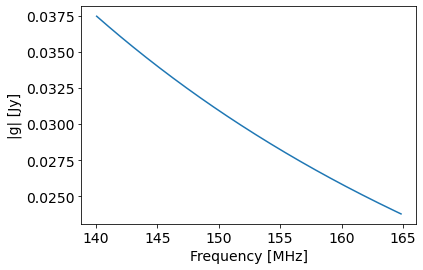

In [23]:
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)
plt.plot(freqs,np.abs(full_gains[(74,'Jee')][0]))
plt.ylabel("|g| [Jy]")
plt.xlabel("Frequency [MHz]")

Text(0.5, 0, 'Frequency [MHz]')

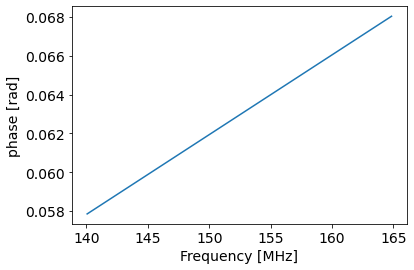

In [24]:
plt.plot(freqs,np.angle(full_gains[(74,'Jee')][0]))
plt.ylabel("phase [rad]")
plt.xlabel("Frequency [MHz]")

In [25]:
# copy over to raw_data
data = copy.deepcopy(model)
data2 = copy.deepcopy(model2)
# apply gains to raw_data
hc.abscal.calibrate_in_place(data, full_gains, gain_convention='multiply')
hc.abscal.calibrate_in_place(data2, full_gains, gain_convention='multiply')
# insert noise
add_noise = True
if add_noise:
    np.random.seed(0)
    Nrms = 1e-4
    for k in data:
        n=(np.random.normal(0, 1, data[k].size) \
                    + 1j * np.random.normal(0, 1, data[k].size)).reshape(data[k].shape) * Nrms / np.sqrt(2) 
        data[k] +=n  
        data2[k] +=n
else:
    Nrms = 1

In [27]:
# get redundant baseline groups
reds = hc.redcal.get_reds(antpos_d, pols=['ee'])
red_data=[]
for red_g in reds:
    bl_group=[]
    for bl in red_g:
        if bl in list(model.keys()):
            bl_group.append(bl)    
    if len(bl_group)>0:   
        red_data.append(bl_group)    

In [28]:
#filter redundant baselines
# filtered_reds = hc.redcal.filter_reds(reds, max_dims=2, bls=data.keys())

# rc = hc.redcal.RedundantCalibrator(filtered_reds)
rc = hc.redcal.RedundantCalibrator(red_data)

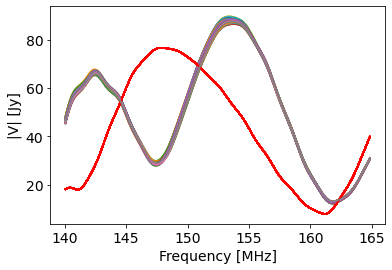

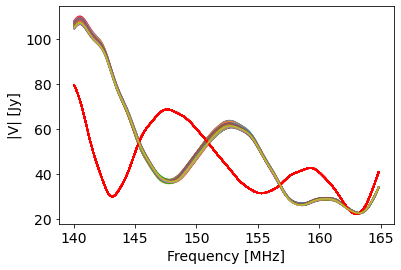

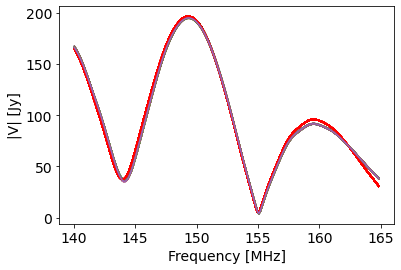

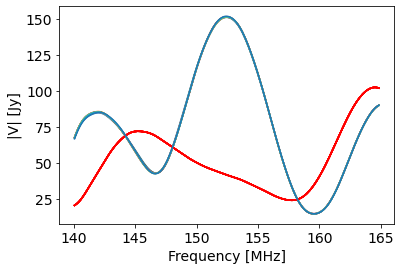

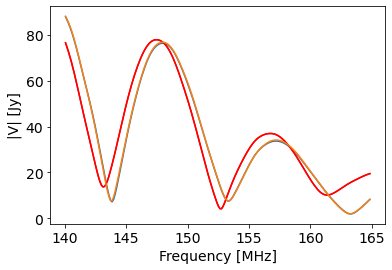

In [29]:

for rg in range(5):
    red_group=red_data[rg]
    plt.figure()
    
    for bls in red_group:
        plt.plot(freqs, np.abs(model2[bls])[0,:],'r')
        plt.plot(freqs, np.abs(model[bls])[0,:])
        plt.ylabel("|V| [Jy]")
        plt.xlabel("Frequency [MHz]")

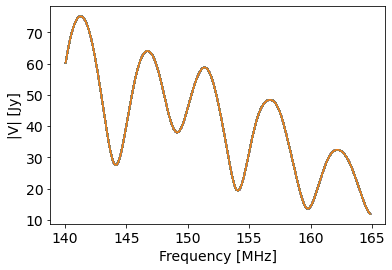

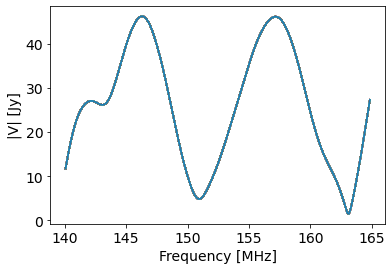

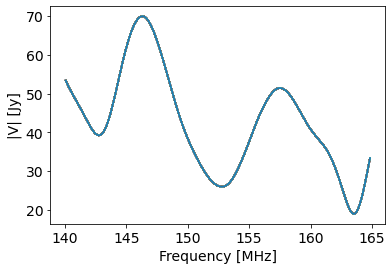

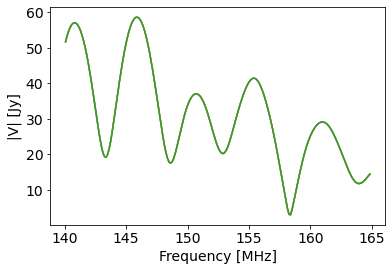

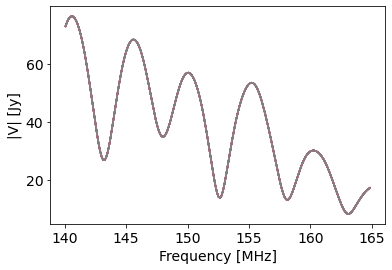

In [30]:

for rg in range(5):
    red_group=red_data[rg+15]
    plt.figure()
    for bls in red_group:

        plt.plot(freqs, np.abs(model2[bls])[0,:])
        plt.ylabel("|V| [Jy]")
        plt.xlabel("Frequency [MHz]")

baseline length 14 and  the max percentage diff 2.7914762602804837
baseline length 14 and  the max percentage diff 2.3877559674530393
baseline length 14 and  the max percentage diff 5.003104425507091
baseline length 16 and  the max percentage diff 1.8750661797983184
baseline length 16 and  the max percentage diff 6.345523774330417


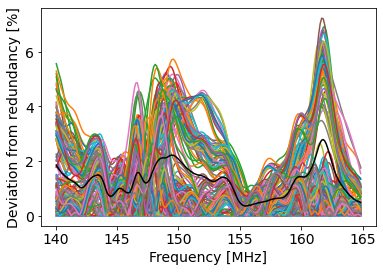

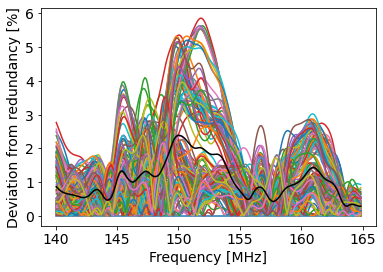

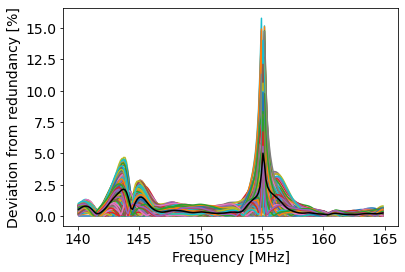

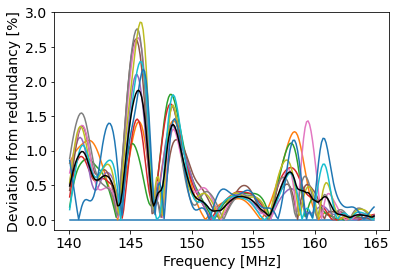

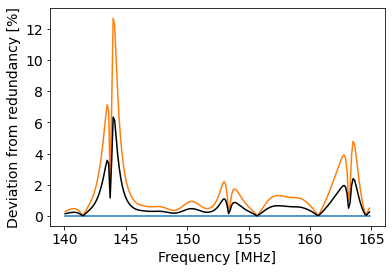

In [31]:
for rg in range(5):
    red_group=red_data[rg]
    k=red_data[rg][0]
    blvec = (antpos[np.where(ants==k[0])] - antpos[np.where(ants==k[1])])

    bl_len = np.linalg.norm(blvec)

    
    plt.figure()
#     vis=model_red[red_group[4]]
    vis_all=[]
    for bl in range (len(red_group)):
        vis_all.append(model_red[red_group[bl]])
  
    vis=np.mean(np.abs(np.array(vis_all)[:,0,:]),axis=0)
    div_vis=[]
#     average=np.ones(div[index].shape)*np.mean(div[index])
    for bls in red_group:
        index=np.where(np.abs(vis)>0)
        div= np.abs((np.abs(model[bls])-np.abs(vis))/np.abs(vis))[0,:]*100
        div_vis.append(div)
        plt.plot(freqs[index],div[index])
      

        plt.ylabel("Deviation from redundancy [%]")
        plt.xlabel("Frequency [MHz]")
    
    average=np.mean(np.array(div_vis),axis=0)  
   
    print("baseline length "+str(int(bl_len))+" and "+" the max percentage diff "+str(np.max(average)))
    
    plt.plot(freqs,average,'k')

# perform redcal-logcal and redcal-lincal (aka omnical)

In [32]:
# get noise wgts (use whatever noise RMS you put into the data)

Nrms = 1e-4
noise_wgts = {k: np.ones_like(data[k], dtype=float) / Nrms**2 for k in data}
cut=0
for k in data:

    blvec = (antpos[np.where(ants==k[0])][0] - antpos[np.where(ants==k[1])][0])
 

    bl_len_EW = np.linalg.norm(blvec)

    if bl_len_EW >0: 
        cut+=1

        noise_wgts[k] = np.ones(noise_wgts[k].shape)*1e-40

In [33]:
%%time
# perform logcal
logcal_meta, logcal_sol = rc.logcal(data)
hc.redcal.make_sol_finite(logcal_sol)
# remove redcal degeneracies from solution
logcal_sol = rc.remove_degen(logcal_sol)
# get gains and model visibilities
logcal_gains, logcal_vis = hc.redcal.get_gains_and_vis_from_sol(logcal_sol)

CPU times: user 11 s, sys: 4.33 s, total: 15.4 s
Wall time: 6.82 s


In [34]:
%%time
# perform logcal
logcal_meta2, logcal_sol2 = rc.logcal(data2)
hc.redcal.make_sol_finite(logcal_sol2)
# remove redcal degeneracies from solution
logcal_sol2 = rc.remove_degen(logcal_sol2)
# get gains and model visibilities
logcal_gains2, logcal_vis2 = hc.redcal.get_gains_and_vis_from_sol(logcal_sol2)

CPU times: user 10.3 s, sys: 3.71 s, total: 14.1 s
Wall time: 6.59 s


In [36]:
%%time
# perform omnical (lincal)
conv_crit = 1e-10
maxiter = 500
gain = 0.4
lincal_meta, lincal_sol = rc.omnical(data, logcal_sol, wgts=noise_wgts, conv_crit=conv_crit,
                                 maxiter=maxiter, gain=gain)
hc.redcal.make_sol_finite(lincal_sol)
# remove redcal degeneracies from solution
lincal_sol = rc.remove_degen(lincal_sol)
# get gains and model visibilities
lincal_gains, lincal_vis = hc.redcal.get_gains_and_vis_from_sol(lincal_sol)

CPU times: user 2min 53s, sys: 1.63 s, total: 2min 54s
Wall time: 2min 54s


In [37]:
%%time
# perform omnical (lincal)
conv_crit = 1e-10
maxiter = 500
gain = 0.4
lincal_meta2, lincal_sol2 = rc.omnical(data2, logcal_sol2, wgts=noise_wgts, conv_crit=conv_crit,
                                 maxiter=maxiter, gain=gain)
hc.redcal.make_sol_finite(lincal_sol2)
# remove redcal degeneracies from solution
lincal_sol2 = rc.remove_degen(lincal_sol2)
# get gains and model visibilities
lincal_gains2, lincal_vis2 = hc.redcal.get_gains_and_vis_from_sol(lincal_sol2)

CPU times: user 2min 18s, sys: 359 ms, total: 2min 19s
Wall time: 2min 19s


Text(0, 0.5, 'phase of g [rad]')

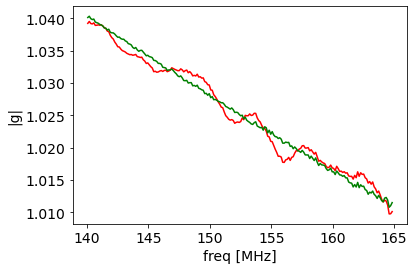

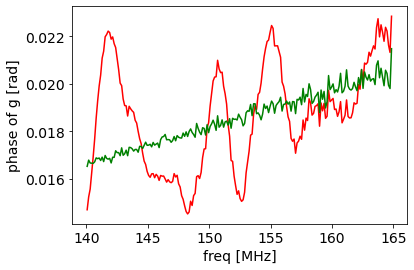

In [38]:
plt.plot(freqs,np.abs(lincal_gains[(74,'Jee')][0,:]),'r')
plt.plot(freqs,np.abs(lincal_gains2[(74,'Jee')][0,:]),'g')
plt.xlabel('freq [MHz]')
plt.ylabel('|g|')
plt.figure()
plt.plot(freqs,np.angle(lincal_gains[(74,'Jee')][0,:]),'r')
plt.plot(freqs,np.angle(lincal_gains2[(74,'Jee')][0,:]),'g')
plt.xlabel('freq [MHz]')
plt.ylabel('phase of g [rad]')

In [39]:
N_t=len(np.unique(hd.time_array))
gains_all=np.zeros(shape=(len(ants),N_t,len(freqs)),dtype=complex)
ant=0
for key in lincal_gains:
    gains_per_ant=lincal_gains[key]
    for t in range (N_t):
        gains_all[ant,t,:]=gains_per_ant[t,:]
    ant=ant+1   
gains_all2=np.zeros(shape=(len(ants),N_t,len(freqs)),dtype=complex)

ant=0
for key in lincal_gains:
    gains_per_ant=lincal_gains2[key]
    for t in range (N_t):
        gains_all2[ant,t,:]=gains_per_ant[t,:]
    ant=ant+1  

In [40]:
from scipy import signal
g0=gains_all

Nant=len(ants)
tau=np.fft.fftshift(np.fft.fftfreq(len(freqs),np.abs(freqs[1]-freqs[0])))*1e3
index=np.where(tau>0)
tau_pos=tau[index]
window=np.ones(g0.shape)
for ant in range (Nant):
    for t in range (N_t):
    
        window[ant,t,:] = signal.blackmanharris(len(freqs))

gain_original_delay=np.mean(np.mean(np.fft.fftshift(np.abs(np.fft.fft(window*g0))),axis=0),axis=0)[index]


g1=gains_all2

Nant=len(ants)
tau=np.fft.fftshift(np.fft.fftfreq(len(freqs),np.abs(freqs[1]-freqs[0])))*1e3
index=np.where(tau>0)
tau_pos=tau[index]
window=np.ones(g0.shape)
for ant in range (Nant):
    for t in range (N_t):
    
        window[ant,t,:] = signal.blackmanharris(len(freqs))

gain_original_delay2=np.mean(np.mean(np.fft.fftshift(np.abs(np.fft.fft(window*g1))),axis=0),axis=0)[index]

(0.0, 4000.0)

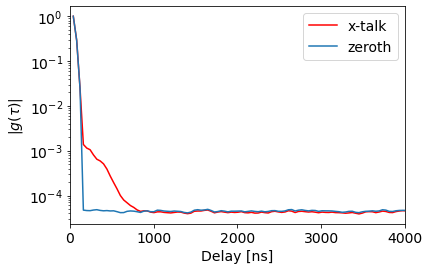

In [41]:

plt.semilogy(tau_pos,gain_original_delay/np.max(gain_original_delay),'r',label="x-talk")
plt.semilogy(tau_pos,gain_original_delay2/np.max(gain_original_delay2),label="zeroth")
plt.xlabel("Delay [ns]")
plt.ylabel("$|g(\\tau)|$")
plt.legend()
plt.xlim(0,4000)

In [42]:
# get noise wgts (use whatever noise RMS you put into the data)
noise_wgts = {k: np.ones_like( data[k], dtype=float) / Nrms**2 for k in  data}

In [44]:
# compute chisq
rc_red_chisq, chisq_per_ant = hc.redcal.normalized_chisq(data, noise_wgts, red_data, lincal_vis, lincal_gains)
rc_red_chisq_dof = len(data) - len(lincal_gains)
rc_red_chisq = rc_red_chisq['Jee']

In [45]:
rc_red_chisq2, chisq_per_ant2 = hc.redcal.normalized_chisq(data2, noise_wgts, red_data, lincal_vis2, lincal_gains2)
rc_red_chisq_dof = len(data) - len(lincal_gains)
rc_red_chisq2 = rc_red_chisq2['Jee']

invalid value encountered in true_divide


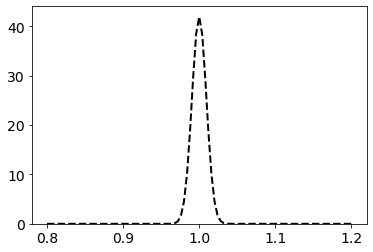

In [46]:
x = np.linspace(0.8, 1.2, 101)
plt.plot(x, stats.chi2.pdf(x * 2*rc_red_chisq_dof, 2*rc_red_chisq_dof) * 2*rc_red_chisq_dof,
         c='k', ls='--', lw=2, label='ideal')
plt.hist(rc_red_chisq.ravel(), bins=51, range=(0.9, 1.1), density=True, histtype='step', lw=2);

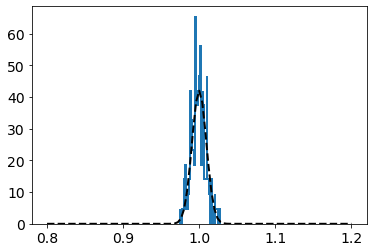

In [47]:
x = np.linspace(0.8, 1.2, 101)
plt.plot(x, stats.chi2.pdf(x * 2*rc_red_chisq_dof, 2*rc_red_chisq_dof) * 2*rc_red_chisq_dof,
         c='k', ls='--', lw=2, label='ideal')
plt.hist(rc_red_chisq2.ravel(), bins=51, density=True, histtype='step', lw=2);

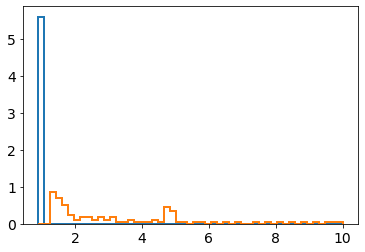

In [48]:
plt.hist(rc_red_chisq2.ravel(), range=(0.9, 10), bins=51, density=True, histtype='step', lw=2);
plt.hist(rc_red_chisq.ravel(),range=(0.9, 10), bins=51, density=True, histtype='step', lw=2);

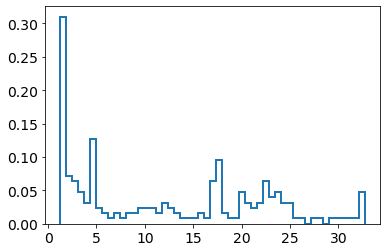

In [49]:
plt.hist(rc_red_chisq.ravel(), bins=51, density=True, histtype='step', lw=2);

# absolute calibration

Use a sky model to compute the degenerate modes of redcal

In [50]:
# calibration with lincal gains
redcal_data = copy.deepcopy(data)
hc.apply_cal.calibrate_in_place(redcal_data, lincal_gains)
rc_flags = {k: np.zeros_like(full_gains[k], dtype=bool) for k in full_gains}

In [51]:
# calibration with lincal gains
redcal_data2 = copy.deepcopy(data2)
hc.apply_cal.calibrate_in_place(redcal_data2, lincal_gains2)


In [52]:
# get noise wgts (use whatever noise RMS you put into the data)
noise_wgts = {k: np.ones_like( data[k], dtype=float) / Nrms**2 for k in  data}

In [53]:
# get noise wgts (use whatever noise RMS you put into the data)
abscal_gains = hc.abscal.post_redcal_abscal(model2, redcal_data, noise_wgts, rc_flags, verbose=False)


In [54]:
# get noise wgts (use whatever noise RMS you put into the data)
abscal_gains2 = hc.abscal.post_redcal_abscal(model2, redcal_data2, noise_wgts, rc_flags, verbose=False)



# compare redcal-abscal gains with starting gains

In [55]:
# combine redcal and abscal gains
total_gains = hc.abscal.merge_gains([lincal_gains, abscal_gains])
total_gains2 = hc.abscal.merge_gains([lincal_gains2, abscal_gains2])
# make sure it has the same reference antenna
# set reference antenna
ref_ant = (127, 'Jee')
hc.abscal.rephase_to_refant(total_gains, ref_ant)
hc.abscal.rephase_to_refant(total_gains2, ref_ant)

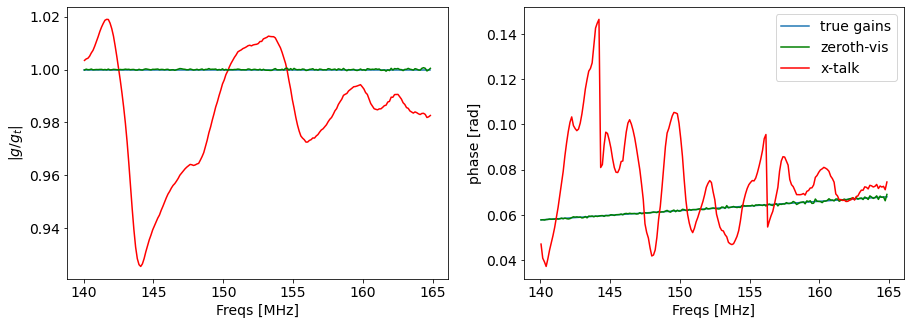

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
k = (74, 'Jee')

ax = axes[0]
# plot ampltiude ratio
ax.plot(freqs, np.abs(full_gains[k] )[0]/np.abs(full_gains[k] )[0])
ax.plot(freqs, np.abs(total_gains[k] )[0]/np.abs(full_gains[k] )[0],'r')
ax.plot(freqs, np.abs(total_gains2[k] )[0]/np.abs(full_gains[k] )[0],'g')
ax.set_xlabel("Freqs [MHz]")
ax.set_ylabel("$|g/g_t|$")

ax = axes[1]
# plot phase ratio
ax.plot(freqs, np.angle(full_gains[k])[0],label='true gains')
ax.plot(freqs, np.angle(total_gains2[k])[0],'g',label='zeroth-vis')
ax.plot(freqs, np.angle(total_gains[k] )[0],'r',label='x-talk')
ax.set_xlabel("Freqs [MHz]")
ax.set_ylabel("phase [rad]")
ax.legend()

In [57]:
gains_all=np.zeros(shape=(len(ants),N_t,len(freqs)),dtype=complex)
ant=0
for key in total_gains:
    gains_per_ant=total_gains[key]
    for t in range (N_t):
        gains_all[ant,t,:]=gains_per_ant[t,:]
    ant=ant+1    
       

In [58]:
gains_all2=np.zeros(shape=(len(ants),N_t,len(freqs)),dtype=complex)
ant=0
for key in total_gains:
    gains_per_ant=total_gains2[key]
    for t in range (N_t):
        gains_all2[ant,t,:]=gains_per_ant[t,:]
    ant=ant+1         
       

In [59]:
from scipy import signal
g0=gains_all
g1=gains_all2

Nant=len(ants)
tau=np.fft.fftshift(np.fft.fftfreq(len(freqs),np.abs(freqs[1]-freqs[0])))*1e3
index=np.where(tau>0)
tau_pos=tau[index]
window=np.ones(g0.shape)
for ant in range (Nant):
    for t in range (N_t):
    
        window[ant,t,:] = signal.blackmanharris(len(freqs))

gain_original_delay=np.mean(np.mean(np.fft.fftshift(np.abs(np.fft.fft(window*g0))),axis=0),axis=0)[index]


gain_original_delay2=np.mean(np.mean(np.fft.fftshift(np.abs(np.fft.fft(window*g1))),axis=0),axis=0)[index]

(0.0, 4000.0)

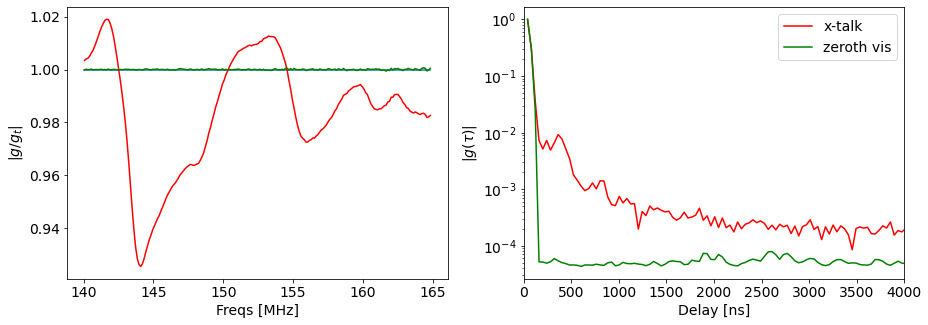

In [60]:
k = (74, 'Jee')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
ax = axes[0]
# plot ampltiude ratio
ax.plot(freqs, np.abs(total_gains[k] )[0]/np.abs(total_gains[k] )[0])
ax.plot(freqs, np.abs(total_gains[k] )[0]/np.abs(full_gains[k] )[0],'r')
ax.plot(freqs, np.abs(total_gains2[k] )[0]/np.abs(full_gains[k] )[0],'g')
ax.set_xlabel("Freqs [MHz]")
ax.set_ylabel("$|g/g_t|$")

ax=axes[1]
ax.semilogy(tau_pos,gain_original_delay/np.max(gain_original_delay),'r',label="x-talk")
ax.semilogy(tau_pos,gain_original_delay2/np.max(gain_original_delay2),'g',label="zeroth vis")
ax.set_xlabel("Delay [ns]")
ax.set_ylabel("$|g(\\tau)|$")
ax.legend()
ax.set_xlim(0,4000)

In [61]:
# get noise wgts (use whatever noise RMS you put into the data)
noise_wgts = {k: np.ones_like( data[k], dtype=float) / Nrms**2 for k in  data}

In [62]:

# get chisq after redcal and abscal
abs_chisq, nObs, _, _ = hc.utils.chisq(data, model2, gains=total_gains, data_wgts=noise_wgts)
chisq_dof = nObs.mean() - len(abscal_gains)
red_chisq = abs_chisq / chisq_dof

invalid value encountered in true_divide


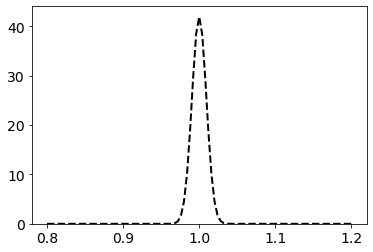

In [63]:
x = np.linspace(0.8, 1.2, 101)
plt.plot(x, stats.chi2.pdf(x * 2*chisq_dof, 2*chisq_dof) * 2*chisq_dof, c='k', ls='--', lw=2, label='ideal')
plt.hist(red_chisq.ravel(), bins=51, range=(0.8, 1.2), density=True, histtype='step', lw=2);

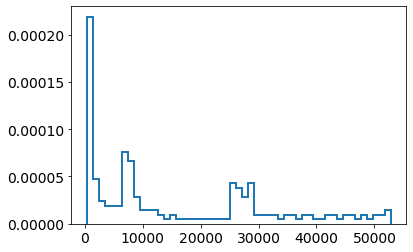

In [64]:
plt.hist(red_chisq.ravel(), bins=51, density=True, histtype='step', lw=2);

In [65]:

# get chisq after redcal and abscal
abs_chisq, nObs, _, _ = hc.utils.chisq(data2, model2, gains=total_gains2, data_wgts=noise_wgts)
chisq_dof = nObs.mean() - len(abscal_gains)
red_chisq = abs_chisq / chisq_dof

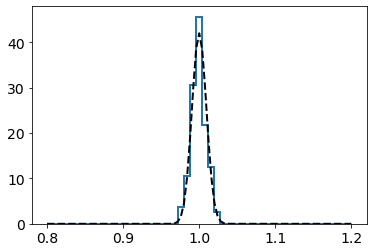

In [66]:
x = np.linspace(0.8, 1.2, 101)
plt.plot(x, stats.chi2.pdf(x * 2*chisq_dof, 2*chisq_dof) * 2*chisq_dof, c='k', ls='--', lw=2, label='ideal')
plt.hist(red_chisq.ravel(), bins=51, range=(0.8, 1.2), density=True, histtype='step', lw=2);

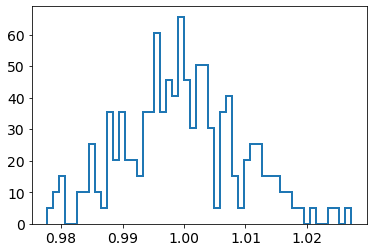

In [67]:
plt.hist(red_chisq.ravel(), bins=51, density=True, histtype='step', lw=2);

In [68]:
# calibrate data
cal_data = copy.deepcopy(data)
hc.apply_cal.calibrate_in_place(cal_data, total_gains)

In [69]:
antpos, ants = hd.get_ENU_antpos()
antpos_dict = dict(zip(ants, antpos))
reds = hc.redcal.get_pos_reds(antpos_dict)

In [70]:
bl_lens, bl_groups = [], []
for red in red_data:
    # get the baseline length of this redundant group
    bl = red[0]
    bl_len = np.linalg.norm(antpos_dict[bl[1]] - antpos_dict[bl[0]])
    # check if this bl_len exists
    if np.isclose(bl_len, bl_lens, atol=1).any():
        bl_groups[-1].extend(red)
    else:
        bl_groups.append(red)
        bl_lens.append(bl_len)


# now average all baselines within each group
N_t=len(np.unique(hd.time_array))
cal_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)
mdl_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)

for i, bl_group in enumerate(bl_groups):
    for j, pol in enumerate(hd.get_pols()):
        cal_wedge[:,i, :, j] = np.mean([cal_data[bl] for bl in bl_group], axis=0)
        mdl_wedge[:,i, :, j] = np.mean([model[bl] for bl in bl_group], axis=0)


# now take the FFT across frequency: cut the edge channels
cal_wedge_fft, delays = hc.vis_clean.fft_data(cal_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')
mdl_wedge_fft, delays = hc.vis_clean.fft_data(mdl_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')

print(cal_wedge_fft.shape)

     

(1, 59, 204, 1)


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


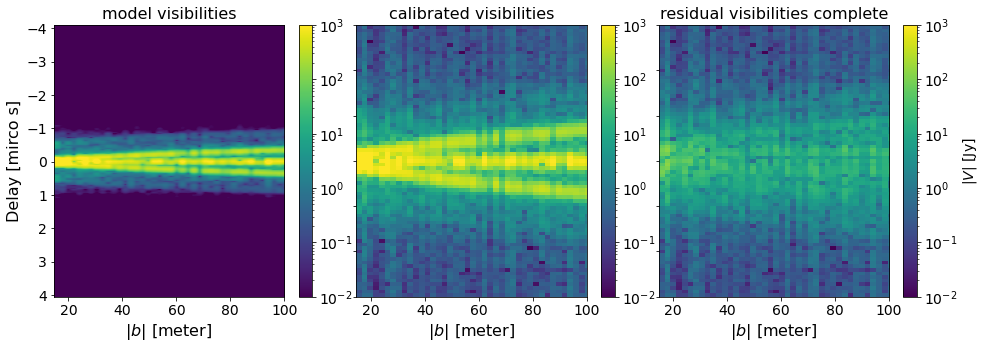

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.subplots_adjust(wspace=0.05)

ax = axes[0]
cax = ax.imshow(np.abs(mdl_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16); ax.set_ylabel(r'Delay [mirco s]', fontsize=16)
ax.set_title("model visibilities", fontsize=16)
# ax.set_ylim(-1.500, 1.500)
ax.set_xlim(bl_lens[0], 100)
fig.colorbar(cax, ax=ax)


ax = axes[1]
cax = ax.imshow(np.abs(cal_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
#fig.colorbar(cax, ax=ax)
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("calibrated visibilities", fontsize=16)
ax.set_yticklabels([])
ax.set_xlim(bl_lens[0], 100)
ax.set_ylim(-1.500, 1.500)
fig.colorbar(cax, ax=ax)

ax = axes[2]
cax = ax.imshow(np.abs(mdl_wedge_fft - cal_wedge_fft)[0,:, :,0].T, aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("residual visibilities complete", fontsize=16)
ax.set_xlim(bl_lens[0], 100)
ax.set_ylim(-1.500, 1.500)
ax.set_yticklabels([])
fig.colorbar(cax, ax=ax, label=r"$|V|$ [Jy]")
# plt.plot(base_line,wedge_line,'w')
# plt.plot(base_line,wedge_line_,'w')


In [72]:
# calibrate data
cal_data = copy.deepcopy(data_un)
hc.apply_cal.calibrate_in_place(cal_data, total_gains2)

In [73]:
# now average all baselines within each group
N_t=len(np.unique(hd.time_array))
cal_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)
mdl_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)

for i, bl_group in enumerate(bl_groups):
    for j, pol in enumerate(hd.get_pols()):
        cal_wedge[:,i, :, j] = np.mean([cal_data[bl] for bl in bl_group], axis=0)
        mdl_wedge[:,i, :, j] = np.mean([model[bl] for bl in bl_group], axis=0)


# now take the FFT across frequency: cut the edge channels
cal_wedge_fft, delays = hc.vis_clean.fft_data(cal_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')
mdl_wedge_fft, delays = hc.vis_clean.fft_data(mdl_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')

print(cal_wedge_fft.shape)

     

(1, 59, 204, 1)


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


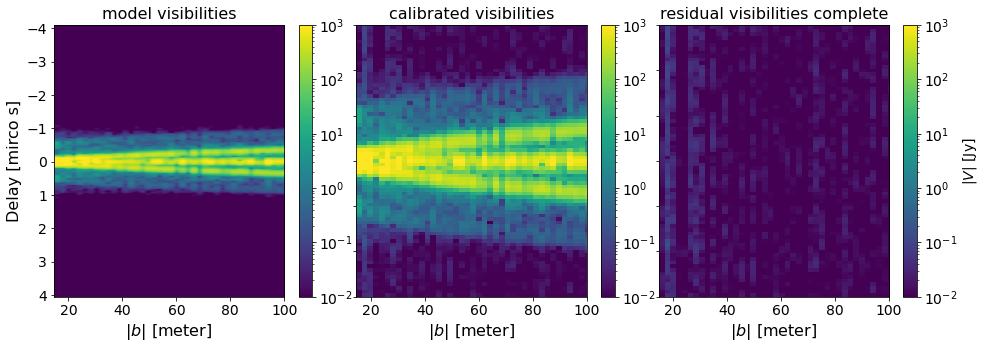

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.subplots_adjust(wspace=0.05)

ax = axes[0]
cax = ax.imshow(np.abs(mdl_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16); ax.set_ylabel(r'Delay [mirco s]', fontsize=16)
ax.set_title("model visibilities", fontsize=16)
# ax.set_ylim(-1.500, 1.500)
ax.set_xlim(bl_lens[0], 100)
fig.colorbar(cax, ax=ax)


ax = axes[1]
cax = ax.imshow(np.abs(cal_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
#fig.colorbar(cax, ax=ax)
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("calibrated visibilities", fontsize=16)
ax.set_yticklabels([])
ax.set_xlim(bl_lens[0], 100)
ax.set_ylim(-1.500, 1.500)
fig.colorbar(cax, ax=ax)

ax = axes[2]
cax = ax.imshow(np.abs(mdl_wedge_fft - cal_wedge_fft)[0,:, :,0].T, aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("residual visibilities complete", fontsize=16)
ax.set_xlim(bl_lens[0], 100)
ax.set_ylim(-1.500, 1.500)
ax.set_yticklabels([])
fig.colorbar(cax, ax=ax, label=r"$|V|$ [Jy]")
# plt.plot(base_line,wedge_line,'w')
# plt.plot(base_line,wedge_line_,'w')


## verify pipeline 

In [75]:
# calibrate data
cal_data = copy.deepcopy(data2)
hc.apply_cal.calibrate_in_place(cal_data, total_gains2)

In [76]:
bl_lens, bl_groups = [], []
for red in red_data:
    # get the baseline length of this redundant group
    bl = red[0]
    bl_len = np.linalg.norm(antpos_dict[bl[1]] - antpos_dict[bl[0]])
    # check if this bl_len exists
    if np.isclose(bl_len, bl_lens, atol=1).any():
        bl_groups[-1].extend(red)
    else:
        bl_groups.append(red)
        bl_lens.append(bl_len)


# now average all baselines within each group
N_t=len(np.unique(hd.time_array))
cal_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)
mdl_wedge = np.zeros((N_t,len(bl_groups), hd.Nfreqs, hd.Npols), dtype=np.complex128)

for i, bl_group in enumerate(bl_groups):
    for j, pol in enumerate(hd.get_pols()):
        cal_wedge[:,i, :, j] = np.mean([cal_data[bl] for bl in bl_group], axis=0)
        mdl_wedge[:,i, :, j] = np.mean([model2[bl] for bl in bl_group], axis=0)


# now take the FFT across frequency: cut the edge channels
cal_wedge_fft, delays = hc.vis_clean.fft_data(cal_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')
mdl_wedge_fft, delays = hc.vis_clean.fft_data(mdl_wedge, np.diff(freqs)[0], axis=2,
                                              edgecut_low=5, edgecut_hi=5, window='bh')

print(cal_wedge_fft.shape)

(1, 59, 204, 1)


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


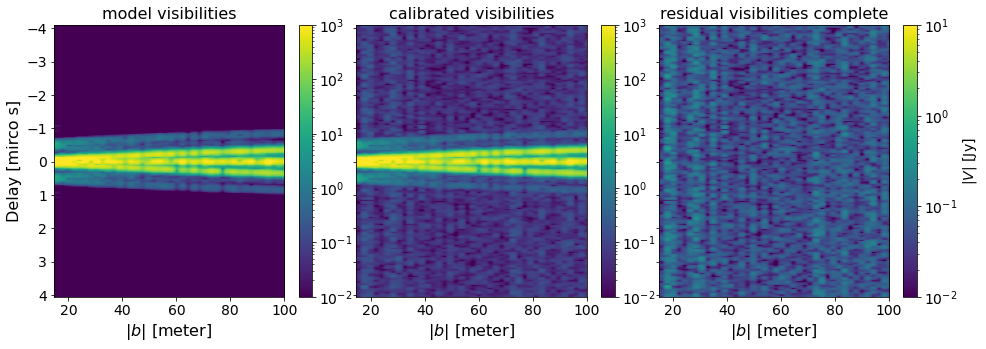

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.subplots_adjust(wspace=0.05)

ax = axes[0]
cax = ax.imshow(np.abs(mdl_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16); ax.set_ylabel(r'Delay [mirco s]', fontsize=16)
ax.set_title("model visibilities", fontsize=16)
# ax.set_ylim(-1.500, 1.500)
ax.set_xlim(bl_lens[0], 100)
fig.colorbar(cax, ax=ax)


ax = axes[1]
cax = ax.imshow(np.abs(cal_wedge_fft[0,:, :,0].T), aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e3, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
#fig.colorbar(cax, ax=ax)
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("calibrated visibilities", fontsize=16)
ax.set_yticklabels([])
ax.set_xlim(bl_lens[0], 100)
# ax.set_ylim(-1.500, 1.500)
fig.colorbar(cax, ax=ax)

ax = axes[2]
cax = ax.imshow(np.abs(mdl_wedge_fft - cal_wedge_fft)[0,:, :,0].T, aspect='auto', norm=matplotlib.colors.LogNorm(),
                vmin=1e-2, vmax=1e1, extent=[bl_lens[0], bl_lens[-1], delays[-1], delays[0]])
ax.set_xlabel(r'$|b|$ [meter]', fontsize=16)
ax.set_title("residual visibilities complete", fontsize=16)
ax.set_xlim(bl_lens[0], 100)
# ax.set_ylim(-1.500, 1.500)
ax.set_yticklabels([])
fig.colorbar(cax, ax=ax, label=r"$|V|$ [Jy]")
# plt.plot(base_line,wedge_line,'w')
# plt.plot(base_line,wedge_line_,'w')

